In [1]:
#Alle Aufgaben
# In dieser Datei werden alle Aufgaben bearbeitet

In [2]:
#libary Imports

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_ind


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
# Hier wird die kuratierte csv eingelesen

df = pd.read_csv('data/Kuratiert.csv', sep = ";", decimal =',')

In [4]:
# Aufgabe 1 - Wie viele Autos wurden verkauft?

In [5]:
# Zuerst schauen wir, wie viele Zeilen es gibt
df.shape

(1995, 7)

In [6]:
# Dann werden alle fehlenden Werte in einer Variable zugewiesen
missing_values_countdf = df["Preis"].isnull().sum()
aufgabe_1 = 1995 - missing_values_countdf

# Anschließend wird von der Gesamtanzahl der Zeilen, die Variable abgezogen, um herauszufinden, welche und wie viele Zeilen nicht leer sind.
print(aufgabe_1)

1104


In [7]:
# Antwort: Es wurden insgesamt 1104 Autos verkauft

In [8]:
# Aufgabe 2 - Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?

In [9]:
# Hier werden statistische Merkmale angezeigt
df.describe()

,Alter,Geschlecht,Zeit,Einkommen,Preis
count,1995.000000,1995.000000,1995.000000,1995.000000,1104.000000
mean,50.158396,0.611028,40.262657,59104.923060,88975.198714
std,11.913807,0.487639,11.621591,16209.529474,24464.067781
min,30.000000,0.000000,3.000000,14547.000000,21471.650000
25%,40.000000,0.000000,32.000000,47093.000000,70609.422500
50%,51.000000,1.000000,40.000000,59104.513014,88931.455000
75%,61.000000,1.000000,48.000000,70639.675007,107093.375000
max,70.000000,1.000000,80.000000,100769.000000,165482.310000


In [10]:
# Antwort: 
# Höchstpreis = 165.482,31 
# Mindestpreis = 21.471,65
# Durchschnittspreis = 88.975,20 

In [11]:
# Aufgabe 3 - Wie hoch war der Gesamtumsatz?

In [12]:
# Alle Werte in der Spalte "Preis" werden summiert und einer Variable zugewiesen.
gesamtumsatz = df.Preis.sum()

# Anschließend wird der Wert der Variable ausgegeben
gesamtumsatz

98228619.38

In [13]:
# Antwort: Der Gesamtumsatz war 98.228.619,38 €

In [14]:
# Aufgabe 4 - Wie viele Autos wurden pro Bundesland verkauft?

In [15]:
# Alle Werte in "Preis" einer jeweiligen "Niederlassung" werden gezählt.
aufgabe_4 = df.groupby("Niederlassung")[["Preis"]].count().reset_index()

aufgabe_4.rename(columns ={"Preis":"Verkaufte Autos"})

# In der spalte "Verkaufte Autos" findet man wie viele Autos in der jeweiligen Niederlassung verkauft wurden

,Niederlassung,Verkaufte Autos
0,Baden-Württemberg,205
1,Bayern,188
2,Berlin,126
3,Brandenburg,37
4,Düsseldorf,1
5,Hamburg,43
6,Hessen,96
7,Niedersachsen,96
8,Nordrhein-Westfalen,174
9,Sachsen,89


In [16]:
# Ein test um sicher zu gehen dass die bisherigen Werte stimmen
# Summe der verkäufe der Niederlassungen muss Summe der gesamten Verkäufe entsprächen.
aufgabe_4.Preis.sum()
# Deckt sich mit bisherigen ergebnissen

1104

In [17]:
#Aufgabe 5 - Wie hoch war der durchschnittliche Umsatz pro Bundesland

In [50]:
# Es wird der Durschnitt aller Werte der jeweiligen Niederlassung berechnet.
aufgabe_5 = df.groupby("Niederlassung")[["Preis"]].mean().round(2).reset_index()
aufgabe_5.rename(columns ={"Preis":"D. Umsatz"})
#In der Spalte "D. Umsatz" stehen alle Durschnitswerte der jeweiligen Niederlassungen.

,Niederlassung,D. Umsatz
0,Baden-Württemberg,90969.56
1,Bayern,89344.31
2,Berlin,89584.98
3,Brandenburg,86673.64
4,Düsseldorf,120215.50
5,Hamburg,85549.50
6,Hessen,85864.93
7,Niedersachsen,87963.31
8,Nordrhein-Westfalen,88451.76
9,Sachsen,89455.08


In [19]:
#Aufgabe 6 - In welchem Bundesland wurde das teuerste Auto verkauft?

In [20]:
# Es wird der Maximalwert der jeweiligen Niederlassungen ausgegeben.
aufgabe_6 = df.groupby("Niederlassung")[["Preis"]].max().reset_index()

#Hier geben wir den Maximalwert der Niederlassungen aus. Also das Bundesland, das das Teuerste Auto verkauft hat.
aufgabe_6.max()

Niederlassung    Thüringen
Preis            165482.31
dtype: object

In [21]:
#Aufgabe 7 - Haben mehr Frauen oder Männer unsere Autos gekauft?

In [22]:
# Geschlecht gruppiert nach Anzahl an Preis einträgen.
aufgabe_7 = df.groupby("Geschlecht")[["Preis"]].count().reset_index()

#In der Ausgabe erkennt man dass Frauen (0) 400 mal ein Auto gekauft haben und Männer(1) 704 mal.

aufgabe_7.rename(columns ={"Preis":"Gekaufte Autos"})
# Männer haben mehr Autos gekauft als Frauen.

,Geschlecht,Gekaufte Autos
0,0,400
1,1,704


In [23]:
# Aufgabe 8 - Wie hoch ist das Durchschnittsalter unserer Kunden? 
#             Wie hoch ist das Durchschnittsalter unserer Besucher?

In [24]:
# Der Dataframe wird um eine Reihe erweitert mit der Information ob es sich um einen Kunden oder Besucher handelt
df = df.assign(Kunde = df["Preis"].notna())

# Gruppierung nach dem Kundenstatus "Kunde" und berechnung des auf zwei Nachkommastellen gerundeten Durschnittsalters.
aufgabe_8 = df.groupby("Kunde")[["Alter"]].mean().reset_index().round(2)

aufgabe_8
# Kunden sind im Schnitt 50,38 und Besucher im Schnitt 49,88 Jahre alt.

,Kunde,Alter
0,False,49.88
1,True,50.38


In [25]:
#Aufgabe 9 - Wie hoch ist das Durchschnittseinkommen unserer Kunden? 
#            Wie hoch ist das Durchschnittseinkommen unserer Besucher?

In [48]:
# Gruppieren nach dem Kundenstatus und berechnung des Durchschnittseinkommen.
aufgabe_9 = df.groupby("Kunde")[["Einkommen"]].mean().reset_index()

# Die Ausgabe anzeigen lassen mit angepasstem Spaltentitel zu "Durchschnittseinkommen" und einem auf zwei Stellen gerundetem Wert.
aufgabe_9a = aufgabe_9.rename(columns ={"Einkommen":"Durchschnittseinkommen"}).round(2)
aufgabe_9a 

,Kunde,Durchschnittseinkommen
0,False,59419.66
1,True,58850.91


In [27]:
#Aufgabe 10 - Bestimmen Sie ob es einen statistisch signifikanten Unterschied 
#             zwischen dem Durschnittseinkommen der Kunden und dem Durchscnittseinkommen der Besucher gibt. 

In [28]:
# Die Nullhypothese: 
# H0: μ 1 = μ 2 (die beiden Populationsmittelwerte sind gleich)
# Die Allternativhypothese: 
# H1: μ 1 ≠ μ 2 (die beiden Populationsmittelwerte sind nicht gleich)

# Daten vorbereiten für die Funktion. Wir benötigen input a und b mit jeweils den Werten der zuvergleichenden Daten.
# Erstellen eines neuen Dataframes mit jeweils den Einkommen der Kunden und der Besucher
a_kunde = df.loc[df["Kunde"] == True, ["Einkommen"]]
b_besucher = df.loc[df["Kunde"] == False, ["Einkommen"]]
#Wir setzen die Einkommen der Kunden und Besucher in die Funktion ein und geben an dass die Varianz gleich ist.
t_test = ttest_ind(a=a_kunde, b=b_besucher, equal_var=True)
t_test

# Interpretation der Ergebnisse:
# Das signifikanzniveau (pvalue) ist 0.44 uns somit > 0.05.
# Wir könen die Nullhypothese des tests nicht ablehnen. 
# Somit gilt: H0| μ 1 = μ 2 (die beiden Populationsmittelwerte sind gleich)
# Es gibt keinen statistisch signifikanten Unterschied 
# zwischen dem Durschnittseinkommen der Kunden und dem Durchscnittseinkommen der Besucher.


TtestResult(statistic=array([-0.7790477]), pvalue=array([0.43604411]), df=array([1993.]))

In [29]:
#Aufgabe 11 - Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit?
#             (Nur für Kunden)

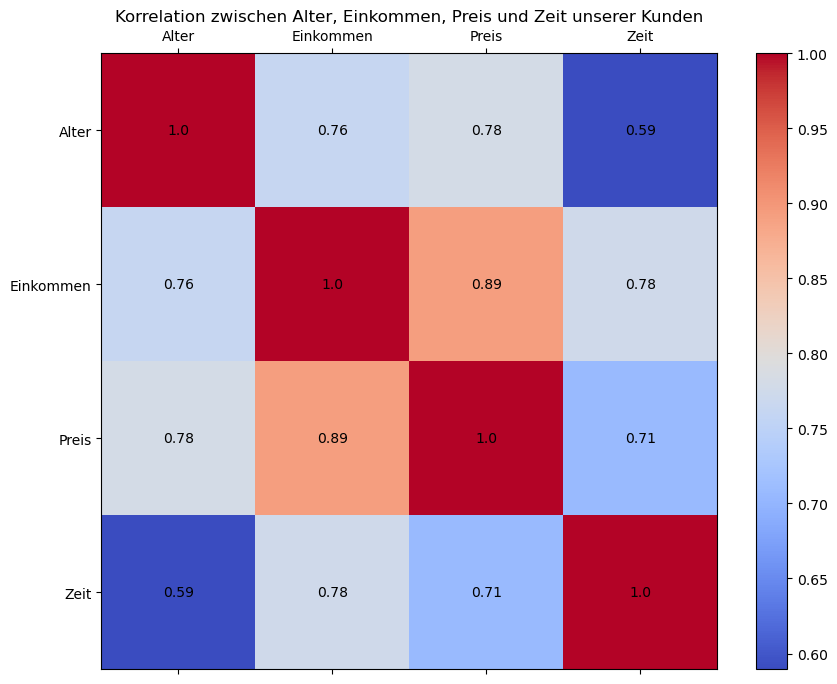

In [30]:
# Erstellen eines Dataframes das nur Kundendaten beinhaltet.
df_kunden = df.loc[df["Kunde"] == True, ["Alter", "Einkommen", "Preis", "Zeit"]]

# Hier wird die Korrelation nochmal visuell dargestellt: 
corr_matrix = df_kunden.corr()

# Erstellen der Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')

# Farbbar hinzufügen
fig.colorbar(cax)

# Setzen der x- und y-Achsen-Ticks und -Labels
ticks = np.arange(0, len(corr_matrix.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

# Annotieren der Zellen
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2),
                       ha="center", va="center", color="black")

# Setzen des Titels
plt.title('Korrelation zwischen Alter, Einkommen, Preis und Zeit unserer Kunden')

# Anzeigen der Heatmap
plt.show()

In [31]:
# Aufgabe 12 - Testen Sie grafisch mit Hilfe eines qq-Plos, ob die Variable Zeit approximativ normalverteilt ist.

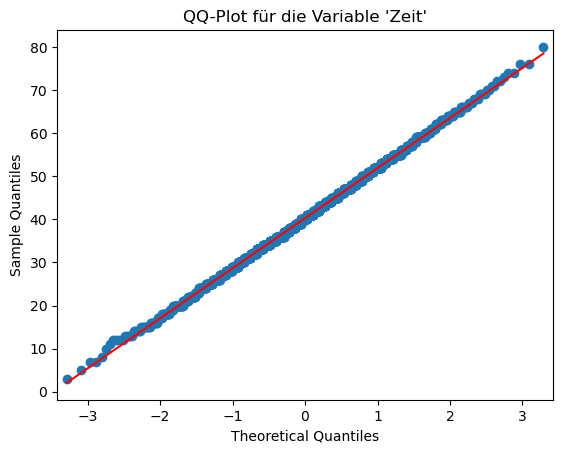

In [32]:
# Mit statsmodels erzeugen wir einen qq Plot unserer Zeit Variable und legen die Normalvertielung (Rotelinie) darüber.
# Zu sehen ist, dass die Variable Zeit approximativ normalverteilt ist.
sm.qqplot(df["Zeit"], line="s")
plt.title("QQ-Plot für die Variable 'Zeit'")
plt.show()

In [33]:
#Aufgabe 13 - Wie viele Kunden haben keinen Bankkredit aufgenommen, um das Auto zu kaufen? 
#             Die Kundenabteilung hat vergessen, diese Informatonen zu erfassen. 
#             Wir können davon ausgehen, dass die Kunden mit einem Jahreseinkommen höher als der Autopreis keinen Kredit aufgenommen haben.

In [34]:
# Bezug auf das vorherig erstellte DataFrame das nur Kundendaten enthält
# Mit dr Funktion np.where erzeugen wir in diesem df_kunden eine neue Spalte mit der 
# Bedingung, dass das Einkommen größer als der Preis sein muss. Um Fehler zu vermeiden, fragen wir ab ob der Preis > 1 ist.
df_kunden["Kredit"] = np.where((df_kunden["Einkommen"] < df_kunden["Preis"]) & (df_kunden["Preis"] > 1),1,0)
aufgabe_13 = str(df_kunden.Kredit.sum())
print("Es haben " + aufgabe_13 + " Kunden einen Bankkredit genutzt.")

#Es haben 1099 Kunden einen Bankkredit genutzt

Es haben 1099 Kunden einen Bankkredit genutzt.


In [35]:
# Aufgabe 14 - Welche sozioökonomischen Merkmale beeinflussen den Kaufpreis? 
#              Wählen Sie die geeigneten unabhängigen Variablen aus und schätzen Sie eine Regression 
#              unter Verwendung der geeigneten Methode 
#              (Verwenden Sie die Bibliothek statsmodel und nicht sklearn.)

In [36]:
# Erstellung eines geeigneten Dataframes
df14 = df.loc[df["Kunde"] == True, ["Alter", "Einkommen", "Preis", "Geschlecht"]]

# Auswahl der abhängigen und unabhängigen Variablen
unabhängigeVar = df14[["Alter", "Einkommen", "Geschlecht"]]
abhängigeVar = df14["Preis"]

# Hinzufügen einer Konstanten 
unabhängigeVar = sm.add_constant(unabhängigeVar)

# Regression durchführen
model = sm.OLS(abhängigeVar, unabhängigeVar).fit()
results = model.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preis   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1693.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:48:26   Log-Likelihood:                -11769.
No. Observations:                1104   AIC:                         2.355e+04
Df Residuals:                    1100   BIC:                         2.357e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        660.4066   1416.736      0.466      0.641   -2119.404    3440.218
Alter        500.7289     40.158     12.469      0.000     421.935     579.523
Einkommen      1.0477      0.029     35.874      0.000       0.990       1.105
Geschlecht  2243.7292    647.696      3.464      0.001     972.871    3514.588
==============================================================================
Omnibus:                       40.961   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.378
Skew:                           0.246   Prob(JB):                     5.80e-18
Kurtosis:                       4.218   Cond. No.                     2.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# Antwort: 
# Sowohl das Alter als auch das Einkommen beeinflussen den Kaufpreis hochsignifikant. Auch das Geschlecht beeinflusst den Kaufpreis stark.
# Je älter oder je mehr Einkommen ein Kunde ist/hat desto höher ist der Kaufpreis. Männer zahlen durchschtlich 2244€ mehr.
# Durch den relativ hohen Wert von 0.822 für R-squared kann man sagen, dass das Modell gut geeignet ist, um den Kaufpreis zu erklären. 

In [38]:
# Aufgabe 15 - Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im Alter von 32 Jahren mit einem Einkommen 
# von 30.000 Euro. Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im Alter von 51 Jahren und mit einem 
# Einkommen von 54.000 Euro.

In [39]:
# Features und Zielvariable definieren
Kundeneigenschaften = df14[['Alter', 'Einkommen','Geschlecht']]  
Kaufpreis = df14['Preis']  

# Lineares Regressionsmodell trainieren
model = LinearRegression()
model.fit(Kundeneigenschaften, Kaufpreis)

# Prognose für den ersten Kunden (32 Jahre, männlich, 30.000 Euro Einkommen)
kunde1 = pd.DataFrame([[32, 30000, 1]], columns=Kundeneigenschaften.columns)
prognose1 = model.predict(kunde1)

# Prognose für den zweiten Kunden (51 Jahre, männlich, 54.000 Euro Einkommen)
kunde2 = pd.DataFrame([[51, 54000, 1]], columns=Kundeneigenschaften.columns)
prognose2 = model.predict(kunde2)

print(f'Prognostizierter Kaufpreis für einen 32-jährigen männlichen Kunden mit einem Einkommen von 30.000 Euro: {prognose1[0]:.2f} Euro')
print(f'Prognostizierter Kaufpreis für einen 51-jährigen männlichen Kunden mit einem Einkommen von 54.000 Euro: {prognose2[0]:.2f} Euro')

Prognostizierter Kaufpreis für einen 32-jährigen männlichen Kunden mit einem Einkommen von 30.000 Euro: 50357.47 Euro
Prognostizierter Kaufpreis für einen 51-jährigen männlichen Kunden mit einem Einkommen von 54.000 Euro: 85015.33 Euro


In [40]:
# Aufgabe 16 - In Bezug auf die vorherige Frage: Welche Variable beeinflusst den Preis des Autos am meisten? Mit anderen Worten: 
# Die von Ihnen geschätzten Regressionskoeffizienten müssen direkt vergleichbar sein. Wie sollen die Daten transformiert werden?

In [41]:
# Standardisierung der Features
scaler = StandardScaler()
Kundeneigenschaften_scaled = scaler.fit_transform(Kundeneigenschaften)

# Lineares Regressionsmodell trainieren mit standardisierten Daten
model = LinearRegression()
model.fit(Kundeneigenschaften_scaled, Kaufpreis)

# Regressionskoeffizienten
Koeffizient = model.coef_
Faetures = Kundeneigenschaften.columns

# Ausgabe der Koeffizienten mit den zugehörigen Feature-Namen
for feature, coef in zip(Faetures, Koeffizient):
    print(f'Standardisierter Koeffizient für {feature}: {coef:.4f}')


Standardisierter Koeffizient für Alter: 5982.5101
Standardisierter Koeffizient für Einkommen: 17219.5202
Standardisierter Koeffizient für Geschlecht: 1078.4939


In [42]:
# Aufgabe 17 - Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt. 
# Verwenden Sie die entsprechende Methode (Sie müssen eine logistische Regression durchführen).

In [43]:
# Features und Zielvariable definieren

y_lg = df[['Alter', 'Einkommen', 'Geschlecht', 'Zeit']]
x_lg = df['Kunde']

# Hinzufügen einer Konstante
y = sm.add_constant(y_lg)

# Durchführen der Logistischen Regression
prognose3 = sm.Logit(x_lg, y).fit()

print(prognose3.summary())

Optimization terminated successfully.
         Current function value: 0.578551
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Kunde   No. Observations:                 1995
Model:                          Logit   Df Residuals:                     1990
Method:                           MLE   Df Model:                            4
Date:                Thu, 27 Jun 2024   Pseudo R-squ.:                  0.1584
Time:                        17:48:26   Log-Likelihood:                -1154.2
converged:                       True   LL-Null:                       -1371.4
Covariance Type:            nonrobust   LLR p-value:                 9.964e-93
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4088      0.263     -9.150      0.000      -2.925      -1.893
Alter          0.0185      0.

In [44]:
# Aufgabe 18 - Wie hoch ist die Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem Einkommen von 30.000 Euro, der das 
# Auto 30 Minuten lang getestet hat, eines unserer Modelle kauft? Wie hoch ist die Wahrscheinlichkeit, dass ein 51-jähriger männlicher 
# Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines unserer Modelle kauft?

In [45]:
x_lg18 = df['Kunde']  # Zielvariable
y_lg18 = df[['Alter', 'Einkommen', 'Geschlecht', 'Zeit']]  # Features

# Standardisierung der Features
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y_lg18)

# Logistisches Regressionsmodell trainieren mit standardisierten Daten
model = LogisticRegression()
model.fit(y_scaled, x_lg18)

# Wahrscheinlichkeiten des Kaufs für den ersten Kunden (32 Jahre, männlich, 30.000 Euro Einkommen, 30 Minuten Testzeit)
# Korrekte Zuordnung der Spaltennamen und Werte für die Kunden
kunde3 = pd.DataFrame([[32, 30000, 1, 30]], columns=['Alter', 'Einkommen', 'Geschlecht', 'Zeit'])
kunde3_scaled = scaler.transform(kunde3)
prognose4 = model.predict_proba(kunde3_scaled)[:, 1]

# Wahrscheinlichkeiten des Kaufs für den zweiten Kunden (51 Jahre, männlich, 54.000 Euro Einkommen, 45 Minuten Testzeit)
kunde4 = pd.DataFrame([[51, 54000, 1, 45]], columns=['Alter', 'Einkommen', 'Geschlecht', 'Zeit'])
kunde4_scaled = scaler.transform(kunde4)
prognose5 = model.predict_proba(kunde4_scaled)[:, 1]

# Ausgabe der Wahrscheinlichkeiten
print(f'Wahrscheinlichkeit des Kaufs für einen 32-jährigen männlichen Kunden mit einem Einkommen von 30.000 Euro und 30 Minuten Testzeit: {prognose4[0]*100:.2f}%')
print(f'Wahrscheinlichkeit des Kaufs für einen 51-jährigen männlichen Kunden mit einem Einkommen von 54.000 Euro und 45 Minuten Testzeit: {prognose5[0]*100:.2f}%')

Wahrscheinlichkeit des Kaufs für einen 32-jährigen männlichen Kunden mit einem Einkommen von 30.000 Euro und 30 Minuten Testzeit: 54.93%
Wahrscheinlichkeit des Kaufs für einen 51-jährigen männlichen Kunden mit einem Einkommen von 54.000 Euro und 45 Minuten Testzeit: 73.98%


In [46]:
# Aufgabe 19 - Auf welche Probleme sind Sie bei der Zusammenführung des Datensatzes gestoßen? Stellen Sie die Operationen vor, 
# die Sie zum Zusammenführen und Bereinigen der Daten durchgeführt haben.

# Bei der Zusammenführung des Datensatzes sind wir auf unterschiedliche kleinere Probleme gestoßen die wir gut lösen konnten. 
# Tatsächlich hat das Zusammenführen der drei Datensätze am Schluss am längsten gedauert, weil hier am meisten getestet werden musste. 

# a) Vielfältigkeit der Datensätze
#    Da sich die Datensätze unterscheiden, musste beim Einlesen darauf geachtet werden, dass sie korrekt eingelesen werden, 
#    denn teilweise war der Delimiter unterschiedlich und teilweise das Zeichen für die Dezimalstelle.

# b) Unterschiedliche Datentypen
#    Es ist aufgefallen, dass der Datentyp nicht immer Optimal gepasst hat. Beispielsweise wurde das Alter einmal als Integer und 
#    einmal als float erkannt. Das stellte zwar kein Problem dar aber wir haben es trotzdem am Schluss zu dem passenderen und performanteren
#    Datentyp (Integer) geändert. 

# c) Fehlende Werte
#    Mit der Funktion DF.describe() ist aufgefallen, dass es fehlende Werte gab. In einer Lister wurden gespeichert, gemischt und 
#    anschließend an den fehlenden stellen eingesetzt. Es wurden folgende Funktionen benutzt: 
#    np.random.shuffle(values) und DF.loc[KundenDF_missing_values.index, 'Geschlecht'] = values

# d) Behandlung von Ausreißer 
#    1. Einkommen - Es gab in beiden .csv Tabellen Ausreißer, welche seperat behandelt wurden
#    Zunächst wurden die Ausreißer mathematisch mit den Funktionen aus der Vorlesung berechnet, eine Spalte welche den Wert True oder False 
#    annehmen kann hinzugefügt und anschließend wurden die Ausreißer visuell dargestellt
#    Hierfür wurden folgende Funktionen benutzt: Q1 = KundenDF['Einkommen'].quantile(0.25) usw. so wie in den Folien, 
#    KundenDF['Ausreißer'] = (KundenDF['Einkommen'] < untere_grenze) | (KundenDF['Einkommen'] > obere_grenze) - um die Spalte hinzuzufügen
#    Zum visualisieren wurden Funktionen aus den Bib. seaborn und matplotlib.pyplot benutzt 
#    Insgesamt konnten 7 Ausreißer festgestellt werden, die wir jeweils mit dem Median der jeweiligen Tabelle ersetzt haben
#    Dazu wurden folgende Funktionen benutzt: medianwertEKinBesucher = BesucherDF['Einkommen'].median() und 
#    BesucherDF.loc[BesucherDF['Ausreißer'], 'Einkommen'] = medianwertEKinBesucher
#    
#    2. Alter - Es gab nur in der .csv Tabelle "Kunden" Ausreißer
#    Zunächst wurde diese Tabelle in einem Histogramm visualisiert. Es ist aufgefallen, dass es zwei falsche Werte gibt. Diese wurden mit
#    dem Modus ersetzt. Dazu wurden folgende Funktionen benutzt: 
#    modusAlter = KundenDF['Alter'].mode()[0] um den Modus einer Variablen zuzuweisen und 
#    KundenDF.loc[falsche_werte_index, 'Alter'] = modusAlter um die falschen Werte zu ersetzen

# e) Behandlung falscher Eingaben 
#    Bei der Textdatei ist aufgefallen, dass es einige falsche Eingaben gab.
#    Zunächst wurde mit folgender Funktion überprüft, welche Wörter überhaupt eingegeben wurden: 
#    uniqueNL = GeoDF['Niederlassung'].unique()
#    Um das Problem zu lösen wurde ein Wörterbuch erstellt und im Anschluss wurden die falschen Eingaben ersetzt. Mit folgenden Funktionen:
#    korrekturen = { 'BERLIN': 'Berlin', 'Berlin-Charlottenburg': 'Berlin', 'Berlin-Mitte': 'Berlin', 'NRW': 'Nordrhein-Westfalen',} und
#    GeoDF['Niederlassung'] = GeoDF['Niederlassung'].replace(korrekturen)

# f) Als letztes wurden die drei Dataframes zusammengeführt und als eine neue .csv exportiert
#    Dazu wurde hauptsächlich die Funktion .merge() benutzt aber der Code wäre zu lang um ihn hier zu kopieren.

In [47]:
# Aufgabe 20 - Welche Vorschläge würden Sie der Kundenabteilung für die Umfrage im nächsten Jahr machen? 
# Welche zusätzlichen Informationen sollten gesammelt werden? Formulieren Sie zwei Vorschläge.


# Um die Vorhersagegenauigkeit und das Verständnis des Kundenverhaltens zu verbessern, würde ich der Kundenabteilung 
# die folgenden Vorschläge für die Umfrage im nächsten Jahr machen:

# Vorschlag 1: Sammlung von Daten über das Kundenverhalten und die Kaufentscheidungsfaktoren

# Zusätzliche Informationen:
# -Motivationen für den Autokauf: Nach den Hauptgründen fragen, warum Kunden ein Auto kaufen möchten 
#                                 (z.B. berufliche Notwendigkeit, Freizeit, Familienerweiterung, etc.)
# -Einflussfaktoren auf die Kaufentscheidung: Ermitteln, welche Faktoren die Kaufentscheidung am meisten beeinflussen 
#                                             (z.B. Preis-Leistungs-Verhältnis, Marke, technische Features, Nachhaltigkeit, 
#                                             Empfehlungen von Freunden/Familie).
# -Kundenzufriedenheit mit dem Testfahrerlebnis: Bewerten Sie, wie zufrieden Kunden mit ihrem Testfahrerlebnis sind
#                                                (z.B. Bewertung von 1-5).

# Begründung: Diese zusätzlichen Informationen geben Einblicke in die Gründe und Motivationen hinter den Kaufentscheidungen der Kunden. 
#             Sie helfen auch zu verstehen, welche Aspekte des Autos und des Kaufprozesses am wichtigsten sind, sodass unser Autohaus 
#             seine Strategien anpassen kann, um die Bedürfnisse und Erwartungen der Kunden besser zu erfüllen.

# Vorschlag 2: Erhebung von demografischen und psychografischen Daten

# Zusätzliche Informationen:
# -Berufliche Situation: Informationen über den Beruf und die Branche der Kunden.
# -Bildungsstand: Erfragen Sie den höchsten Bildungsabschluss der Kunden.
# -Freizeitinteressen und Lebensstil: Erheben Sie Informationen über die Freizeitinteressen und Hobbys der Kunden.
# -Haushaltsgröße und Familienstand: Informationen über die Anzahl der Personen im Haushalt und den Familienstand.

# Begründung:
# Demografische und psychografische Daten bieten wertvolle Erkenntnisse über die Zielgruppe und deren Lebensstil.
# Diese Informationen können genutzt werden, um gezielte Marketingstrategien zu entwickeln und die Produktangebote besser 
# an die Bedürfnisse der unterschiedlichen Kundensegmente anzupassen. Sie ermöglichen auch eine personalisierte Ansprache und 
# verbessern die Relevanz der Werbebotschaften.

# Durch die Sammlung dieser zusätzlichen Informationen kann die Kundenabteilung ein umfassenderes und genaueres Bild der 
# Kundenbedürfnisse und -verhaltensweisen zeichnen, was zu einer verbesserten Kundenbindung und höheren Verkaufszahlen führen kann.